# EN2550: Assignment 03 on Object Counting on a Conveyor Belt

## Name : Ekanayaka S.D.                                                                      
## Index : 190162F
## Connected Component Analysis

In this part, we will generate an indexed image representing connected components in conveyor_f101.png image. Notice that, as there are three square nuts and one hexagonal nut in the image, there will be five connected components (backgound will be assigned the label 0).

Open the hexnut_template.png, squarenut_template.png and conveyor_f100.png and display. This is done for you.

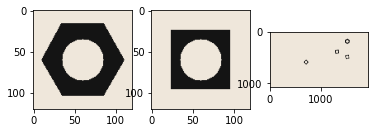

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

Convert the images to grayscale and apply Otsu's thresholding to obtain the binarized image. Do this for both the templates and belt images. See https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html for a guide. State the threshold value (automatically) selected in the operation. Display the output images.

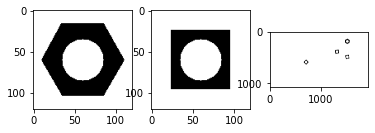

20.0 20.0 20.0


In [3]:
img1=cv.cvtColor(hexnut_template, cv.COLOR_BGR2GRAY)
img2=cv.cvtColor(squarenut_template, cv.COLOR_BGR2GRAY)
img3=cv.cvtColor(conveyor_f100,cv.COLOR_BGR2GRAY)


# Otsu's thresholding

ret1,th1 = cv.threshold(img1,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
ret2,th2 = cv.threshold(img2,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
ret3,th3 = cv.threshold(img3,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(th1, cv.COLOR_GRAY2RGB))
ax[1].imshow(cv.cvtColor(th2, cv.COLOR_GRAY2RGB))
ax[2].imshow(cv.cvtColor(th3, cv.COLOR_GRAY2RGB))
plt.show()
print(ret1,ret2,ret3)

Carry out morphological closing to remove small holes inside the foreground. Use a 
3
×
3
 kernel. See https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html for a guide.

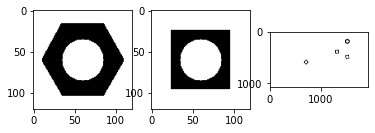

In [4]:
import numpy as np
kernel = np.ones((3,3),np.uint8)
closing1= cv.morphologyEx((cv.cvtColor(th1, cv.COLOR_GRAY2RGB)), cv.MORPH_CLOSE, kernel)
closing2= cv.morphologyEx((cv.cvtColor(th2, cv.COLOR_GRAY2RGB)), cv.MORPH_CLOSE, kernel)
closing3= cv.morphologyEx((cv.cvtColor(th3, cv.COLOR_GRAY2RGB)), cv.MORPH_CLOSE, kernel)
fig, ax = plt. subplots(1,3)
ax[0].imshow(closing1)
ax[1].imshow(closing2)
ax[2].imshow(closing3)
plt.show()
                          

## Connected components analysis for Hexnut template


In [5]:
connectivity = 4
hex_num_labels,hex_labels,hex_stat,hex_cent = cv.connectedComponentsWithStats(th1, connectivity, cv.CV_32S)
print('There are {} connected components in Hexnut template.'.format(hex_num_labels))
print('Statistics:')
print(hex_stat)
print()
print('Centroids:')
print(hex_cent)

There are 3 connected components in Hexnut template.
Statistics:
[[  10   16  101   88 4724]
 [   0    0  120  120 7715]
 [  35   35   51   51 1961]]

Centroids:
[[59.83361558 59.22290432]
 [59.16863253 59.54257939]
 [60.         60.        ]]


## Connected components analysis for Squarenut template

In [6]:
connectivity = 4
sqr_num_labels,sqr_labels,sqr_stat,sqr_cent = cv.connectedComponentsWithStats(th2, connectivity, cv.CV_32S)
print('There are {} connected components in Squarenut template.'.format(sqr_num_labels))
print('Statistics:')
print(sqr_stat)
print()
print('Centroids:')
print(sqr_cent)

There are 3 connected components in Squarenut template.
Statistics:
[[  24   24   72   72 3223]
 [   0    0  120  120 9216]
 [  35   35   51   51 1961]]

Centroids:
[[59.19578033 59.19578033]
 [59.5        59.5       ]
 [60.         60.        ]]


## Connected components analysis for Conveyor belt

In [7]:
connectivity = 8
belt_num_labels,belt_labels,belt_stat,belt_cent = cv.connectedComponentsWithStats(th3, connectivity, cv.CV_32S)
print('There are {} connected components in Conveyor belt.'.format(belt_num_labels))
print('Statistics:')
print(belt_stat)
print()
print('Centroids:')
print(belt_cent)

There are 6 connected components in Conveyor belt.
Statistics:
[[    650     150     896     501   13938]
 [      0       0    1920    1080 2051818]
 [   1475     175      51      51    1961]
 [   1275     375      51      51    1961]
 [   1475     475      51      51    1961]
 [    675     575      51      51    1961]]

Centroids:
[[1274.92050509  400.1106328 ]
 [ 956.24678115  540.8845999 ]
 [1500.          200.        ]
 [1300.          400.        ]
 [1500.          500.        ]
 [ 700.          600.        ]]


## Contour analysis

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


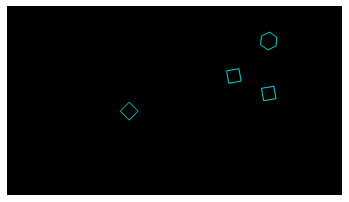

In [8]:
black_img=np.zeros(conveyor_f100.shape)
contours, hierarchy = cv.findContours(th3, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cnt = [contours[i] for i in range(1,9,2)]
cv.drawContours(black_img, cnt, -1, (0,255,150), 3)
plt.imshow(black_img)
plt.axis('off')
plt.show()

## Detecting Objects on a Synthetic Conveyor

In [27]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
F = []
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    F.append(frame)
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.


## Number of matching hexagonal nuts

In [26]:
total_matches=0
for i in range(len(contours)):
    ret = cv.matchShapes(contours[i],contours[7],1,0.0)
    if ret==0.0:
        total_matches+=1
print('Number of matching hexagonal nuts = ',total_matches)

Number of matching hexagonal nuts =  2


## Detecting Objects on a Synthetic Conveyor and counting hexagonal nuts

In [28]:
total_nuts=0
frame_count=0

for frm in F[:-1]:
    
    frame_total=0
    left_center=[]  
    img_gray = cv.cvtColor(frm,cv.COLOR_BGR2GRAY)
    ret_f,thresh = cv.threshold(img_gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
    contours_frame,hierarchy_frame = cv.findContours(thresh,cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    cntn=[]
    hexa =[]
    for cn in contours_frame:
        if cv.contourArea(cn)>4500 and cv.contourArea(cn)<7500:
            cntn.append(cn)
        
    for cn in cntn:
        ret_count = cv.matchShapes(cn,contours[7],1,0.0)
        
        if (0.004<ret_count<0.006):
            frame_total+=1
            hexa.append(cn)
                
    for i in hexa:
        M = cv.moments(i)
        cx = int(M['m10']/M['m00'])
        if (1010-cx)>=0:
            left_center.append(cx)
    for i in left_center:
        if 1010-i<10:
            total_nuts+=1
        
    
    
    frame_count+=1
    in_text= 'In frame : '+str(frame_total)
    upto_text='Upto frame : '+str(total_nuts)
    cv.putText(frm,in_text,(100,150),cv.FONT_HERSHEY_COMPLEX,1,(0,250,0),1,cv.LINE_AA)
    cv.putText(frm,upto_text,(100,180),cv.FONT_HERSHEY_COMPLEX,1,(0,250,0),1,cv.LINE_AA)

In [29]:
# Writing the video

frame_array = F[:-1]
shape = (1080, 1920, 3)



out = cv.VideoWriter('./conveyor_result_190162F.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (shape[1], shape[0]))
 
for i in range(len(frame_array)):
    cv.imshow('Frame', frame_array[i])
    if cv.waitKey(1) == ord('q'):
        break
    out.write(frame_array[i])

out.release()
cv.destroyAllWindows()

##  github Link :  https://github.com/sasdil/EN-2550-Computer-Vision